In [ ]:
import pandas as pd
import numpy as np
import warnings
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the data file
names = ['id','age', 'gender', 'education', 'country',
'ethnicity', 'neuroticism', 'extraversion', 'openness_to_experience',
'agreeableness','conscientiousness', 'impulsiveness', 'sensation', 'alcohol', 'amphet',
'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy',
'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms',
'nicotine', 'semer', 'vsa']
df = pd.read_csv('drug_consumption.data', names=names)

In [ ]:
df.head()

In [4]:
# Filter the columns
df_filtered = df[['id','age', 'gender', 'education',
          'neuroticism', 'extraversion', 
          'openness_to_experience', 'agreeableness',
          'conscientiousness', 'impulsiveness', 'sensation',
          'cannabis']]

In [5]:
df_filtered.head()

,id,age,gender,education,neuroticism,extraversion,openness_to_experience,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,1,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL0
1,2,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
2,3,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3
3,4,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
4,5,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL3


In [ ]:
# # Replace Cannabis list with original classification
# df_filtered.replace({
#     'CL0' : 'Never Used', 
#     'CL1' : 'Used over a Decade Ago',
#     'CL2' : 'Used in Last Decade',
#     'CL3' : 'Used in Last Year',
#     'CL4' : 'Used in Last Month',
#     'CL5' : 'Used in Last Week',
#     'CL6' : 'Used in Last Day'})

In [6]:
# Replace and combine the cannabis result into 0 = never used and 1 = used -past or present-
df_cannabis = df_filtered.replace({
    'CL0' : 0, 
    'CL1' : 1,
    'CL2' : 1,
    'CL3' : 1,
    'CL4' : 1,
    'CL5' : 1,
    'CL6' : 1})

df_cannabis.head()

,id,age,gender,education,neuroticism,extraversion,openness_to_experience,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,1,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,2,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,3,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
3,4,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
4,5,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1


In [7]:
# Check for nulls
df_cannabis.isnull().sum().head()

id             0
age            0
gender         0
education      0
neuroticism    0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# NULL Heatmap for Train data
sns.heatmap(df_cannabis.isnull(),yticklabels=False, cbar=False,cmap='inferno',annot=True)

In [9]:
list(df_cannabis)
df.shape

(1885, 32)

In [10]:
data.head()

NameError: name 'data' is not defined

In [ ]:
X_train.info()


## Data Visualization for understanding the Data


In [11]:
# Duplicate a dataset for visualization purpose
df_V = pd.read_csv('manual_personality_scores_drugdata_original_plus_onehot.csv')

df_V = df_V[['id','age', 'gender', 'education',
          'neuroticism', 'extraversion', 
          'openness', 'agreeableness',
          'conscientiousness', 'impulsiveness', 'sensation',
          'cannabis']]

df_V.head()

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,1,3,0,6,39,36,42,37,42,10,3,0
1,2,2,1,9,29,52,55,48,41,9,9,1
2,3,3,1,6,31,45,40,32,34,8,10,1
3,4,1,0,8,34,34,46,47,46,8,3,1
4,5,3,0,9,43,28,43,41,50,10,9,1


[Text(0, 0, '0'),
 Text(0, 0, '18'),
 Text(0, 0, '24'),
 Text(0, 0, '35'),
 Text(0, 0, '45'),
 Text(0, 0, '55'),
 Text(0, 0, '65+')]

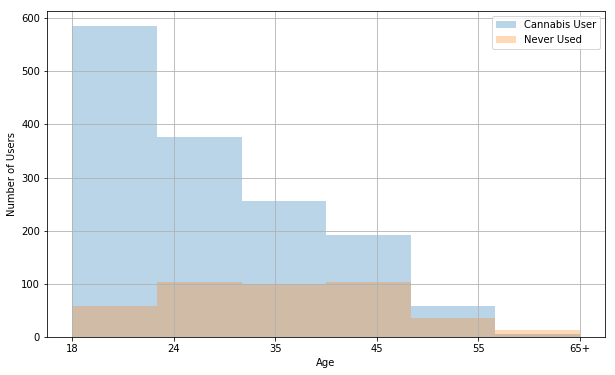

In [12]:
# 1) Observing drug consumption rate over Age

age = pd.concat([df_V[df_V.cannabis==1]['age'],df_V[df_V.cannabis==0]['age']],axis=1)
age.columns=['Cannabis User','Never Used']

AgePlot = age.plot(kind='hist',bins=6,figsize=(10,6),alpha=0.3,grid=True)
AgePlot.set(ylabel = 'Number of Users', xlabel='Age')

AgeLabels = ['0','18','24','35','45','55','65+']
AgePlot.set_xticklabels(AgeLabels)

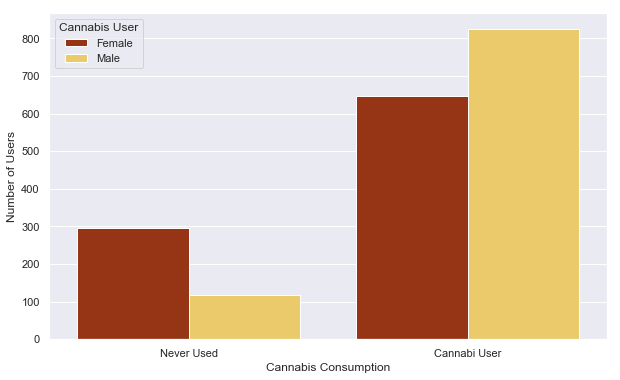

In [21]:
# 2) Validating drug consumption rate across Gender
sns.set(rc={'figure.figsize':(10,6)})
GenderPlot = sns.countplot(x='cannabis',hue='gender',data=df_V,palette='afmhot')

labels = ['Never Used', 'Cannabi User']
GenderPlot.set_xticklabels(labels)

GenderPlot.set(ylabel = 'Number of Users', xlabel='Cannabis Consumption')
plt.legend(title='Cannabis User', loc='upper left', labels=['Female', 'Male'])

C:\Users\CY\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


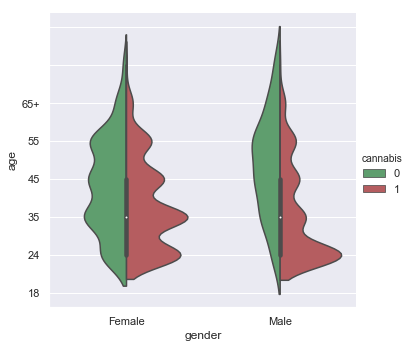

In [26]:
Age_Gender_Plot = sns.factorplot(x='gender' , y='age' , data=df_V , hue='cannabis' , kind='violin' , palette=['g','r'] , split=True)

AgeLabels = ['0','18','24','35','45','55','65+']
Age_Gender_Plot.set_yticklabels(AgeLabels)

genderlabels = ['Female', 'Male']
Age_Gender_Plot.set_xticklabels(genderlabels)

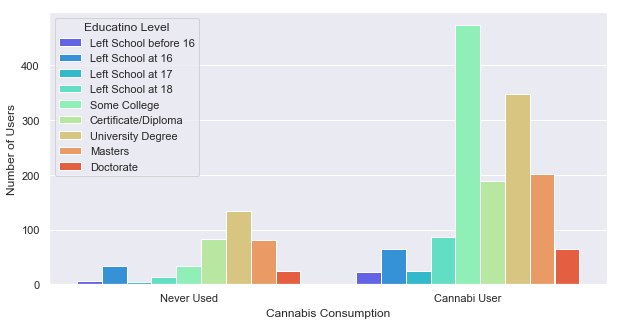

In [27]:
# 3) Analyzing drug consumption rate across Education Level
sns.set(rc={'figure.figsize':(10,5)})
x = ('yes','no')
EducationPlot = sns.countplot(x='cannabis',hue='education',data=df_V,palette='rainbow')

EducationPlot.set_xticklabels(labels)
EducationPlot.set(ylabel = 'Number of Users', xlabel='Cannabis Consumption')

plt.legend(title='Educatino Level', loc='upper left', 
           labels=['Left School before 16', 'Left School at 16', 'Left School at 17', 'Left School at 18',
                   'Some College', 'Certificate/Diploma', 'University Degree', 'Masters', 'Doctorate'])

[Text(0, 0, 'Left School before 16'),
 Text(0, 0, 'Left School at 16'),
 Text(0, 0, 'Left School at 17'),
 Text(0, 0, 'Left School at 18'),
 Text(0, 0, 'Some College'),
 Text(0, 0, 'Certificate/Diploma'),
 Text(0, 0, 'University Degree'),
 Text(0, 0, 'Masters'),
 Text(0, 0, 'Doctorate')]

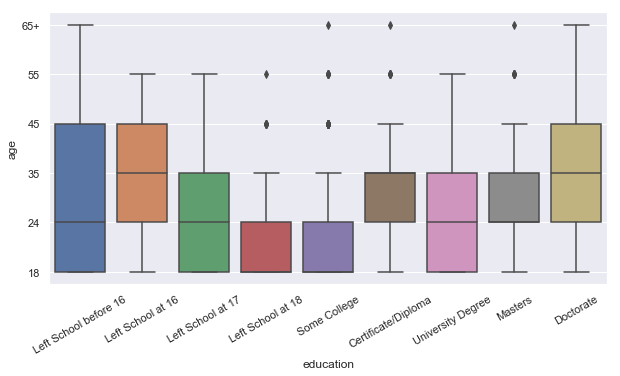

In [28]:
df_V2 = df_V[df_V.cannabis == 1]
Age_Education_Plot = sns.boxplot(x='education',y='age',data=df_V2)

AgeLabels = ['0','18','24','35','45','55','65+']
Age_Education_Plot.set_yticklabels(AgeLabels)

EducationLabels = ['Left School before 16', 'Left School at 16', 'Left School at 17', 'Left School at 18',
                   'Some College', 'Certificate/Diploma', 'University Degree', 'Masters', 'Doctorate']
Age_Education_Plot.set_xticklabels(EducationLabels,rotation=30)


In [29]:
# Bringing all the basic personal information features above (Age, Gender, Education) together and create a pivot table

ASE=df_V[df_V.cannabis.notnull()].pivot_table(index=['age','gender','education'],values=['cannabis']).sort_values('cannabis',ascending=False)
ASE

cannabis
age gender education          
1   0      1          1.000000
2   1      4          1.000000
5   1      3          1.000000
    0      9          1.000000
           3          1.000000
4   0      4          1.000000
2   1      1          1.000000
           3          1.000000
           6          1.000000
    0      3          1.000000
3   0      1          1.000000
4   1      3          1.000000
3   1      1          1.000000
4   1      1          1.000000
3   1      3          1.000000
           4          1.000000
2   0      4          1.000000
5   0      2          1.000000
1   1      2          1.000000
           4          1.000000
2   0      1          1.000000
6   0      9          1.000000
    1      8          1.000000
1   1      1          1.000000
6   0      6          1.000000
1   1      3          1.000000
           8          1.000000
           9          1.000000
           5          0.987179
           6          0.970588
...                        ...
5   0      5          0.600000
4   0      9          0.600000
1   0      2          0.600000
4   0      7          0.577778
3   1      9          0.571429
    0      6          0.568182
4   1      6          0.555556
1   0      8          0.555556
5   0      4          0.500000
    1      9          0.500000
2   0      2          0.500000
6   1      5          0.500000
5   1      1          0.500000
    0      8          0.500000
4   0      2          0.466667
3   0      2          0.416667
5   0      6          0.416667
3   0      4          0.400000
4   0      6          0.394737
6   1      1          0.333333
3   0      3          0.333333
6   1      7          0.000000
           6          0.000000
5   0      1          0.000000
4   0      3          0.000000
6   0      8          0.000000
           4          0.000000
           2          0.000000
5   1      4          0.000000
6   1      9          0.000000

[100 rows x 1 columns]

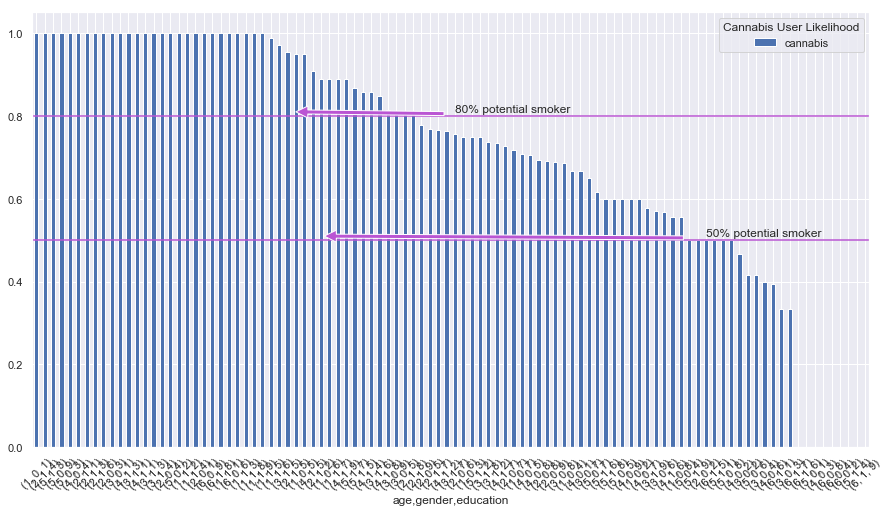

In [30]:
# From the pivot tables above, there is definitely a relationship among 'Age','Gender','Education'and 'Drug Consumer'
# So we can combine them together ==> Combined feature 'A.S.E'; and visualize it:

ASE.plot(kind='bar',figsize=(15,8))
plt.xticks(rotation=45)
plt.axhline(0.8,color='#BA55D3')
plt.axhline(0.5,color='#BA55D3')
plt.annotate('80% potential smoker',xy=(30,0.81),xytext=(50,0.81),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.annotate('50% potential smoker',xy=(32,0.51),xytext=(80,0.51),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.legend(title='Cannabis User Likelihood', loc='upper right')




## Basic Modeling & Evaluation
### We choose 5 models and use 5-folds cross-calidation to evaluate these models.

    · Logistic Regression
    · k-Nearest Neighbors
    · Random Forrest
    · Gradient Boosting Decision Tree
    · Support Vector Machine


In [31]:
# Define all the predictors
predictors=['age', 'gender', 'education',
          'neuroticism', 'extraversion', 
          'openness_to_experience', 'agreeableness',
          'conscientiousness', 'impulsiveness', 'sensation']

In [40]:
# from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [41]:
from sklearn.model_selection import train_test_split

target = df_V["cannabis"]

data = df_V.drop(columns=["cannabis","id"])
feature_names = data.columns

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

In [42]:
X_train.head()

,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation
785,1,1,6,21,48,42,39,33,3,7
1341,1,1,4,49,31,38,26,48,8,9
53,4,1,8,23,39,53,45,44,10,9
974,1,1,5,30,47,51,47,42,10,6
1209,1,1,5,33,32,48,40,34,8,7


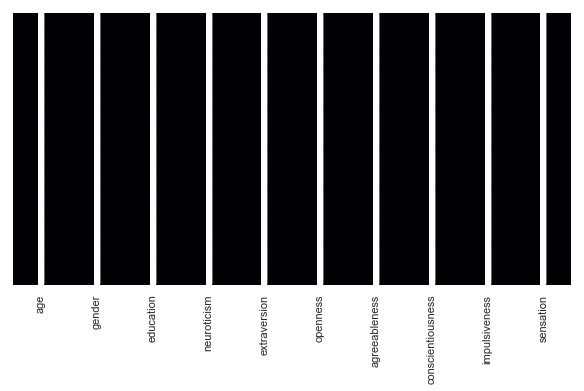

In [35]:
sns.heatmap(X_train.isnull(),yticklabels=False, cbar=False,cmap='inferno',annot=True)

In [43]:
# Summary of train data
X_train.describe()

,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation
count,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
mean,2.329087,0.499646,6.002123,35.634112,39.670913,45.658882,43.372258,41.483369,7.196745,6.125973
std,1.284020,0.500177,1.751364,8.999915,6.647220,6.601119,6.361412,6.875917,2.243862,2.701848
min,1.000000,0.000000,1.000000,12.000000,16.000000,24.000000,12.000000,20.000000,1.000000,1.000000
25%,1.000000,0.000000,5.000000,29.000000,36.000000,41.000000,39.000000,37.000000,5.000000,4.000000
50%,2.000000,0.000000,6.000000,35.000000,40.000000,46.000000,44.000000,42.000000,8.000000,6.000000
75%,3.000000,1.000000,7.000000,42.000000,44.000000,51.000000,48.000000,46.000000,9.000000,8.000000
max,6.000000,1.000000,9.000000,60.000000,58.000000,60.000000,58.000000,59.000000,10.000000,10.000000


In [44]:
# Scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
models=[LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),SVC()]

In [46]:
# evaluate models by using cross-validation
names=['LR','KNN','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X_train,y_train,cv=5)
    print("{}:{},{}".format(name,score.mean(),score))

NameError: name 'cross_val_score' is not defined

In [47]:
## 1) We notice that Support Vector Machine and Logistic Regression might perform better on scaled data;

## 2) Then we will use GradientBoostingClassifier to see which features are important

model=GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [48]:
model.feature_importances_

array([0.09157154, 0.03756955, 0.09714428, 0.06066784, 0.08775075,
       0.27170645, 0.0695954 , 0.16399327, 0.02557078, 0.09443015])

In [49]:
FI=pd.DataFrame({'importance':model.feature_importances_},index=X_train.columns)
FI.sort_values('importance',ascending=False)

,importance
openness,0.271706
conscientiousness,0.163993
education,0.097144
sensation,0.094430
age,0.091572
extraversion,0.087751
agreeableness,0.069595
neuroticism,0.060668
gender,0.037570
impulsiveness,0.025571


Text(0.5, 1.0, 'Feature Importance')

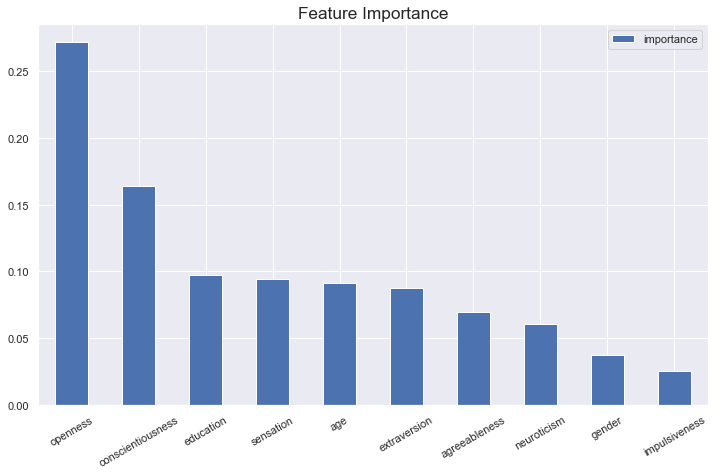

In [50]:
FI.sort_values('importance',ascending=False).plot.bar(figsize=(12,7))
plt.xticks(rotation=30)
plt.title('Feature Importance',size='x-large')

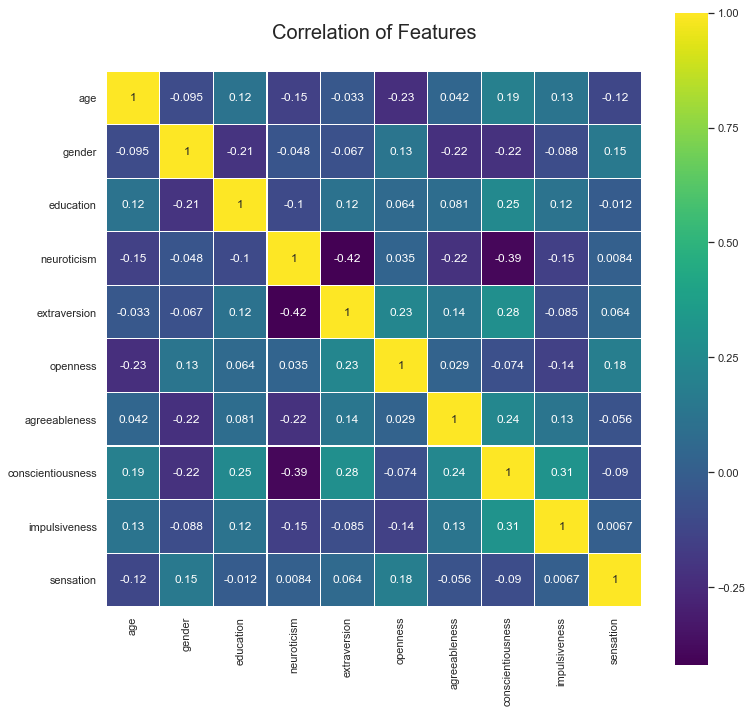

In [51]:
# Draw a Correlation heatmap for all the features
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train[['age', 'gender', 'education',
          'neuroticism', 'extraversion', 
          'openness', 'agreeableness',
          'conscientiousness', 'impulsiveness', 'sensation']].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

##### k-Nearest Neighbors

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

grid_search.fit(X_train,y_train)

grid_search.best_params_,grid_search.best_score_

In [ ]:
# test scores
grid_search.fit(X_test,y_test)
grid_search.best_params_,grid_search.best_score_

###### Support Vector Machine

In [ ]:
# Create SVC model
from sklearn.svm import SVC
SVCmodel = SVC(kernel='linear')
SVCmodel.fit(X_train_scaled, y_train)

print(f"Training Data Score: {SVCmodel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {SVCmodel.score(X_test_scaled, y_test)}")

In [ ]:
# Create the GridSearchCV model for SVC model
from sklearn.model_selection import GridSearchCV
svc_param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01],
              'kernel': ['linear']}
svc_grid = GridSearchCV(SVCmodel, svc_param_grid, verbose=3)

In [ ]:
# Fit the model using the grid search estimator
svc_grid.fit(X_train_scaled, y_train)

In [ ]:
# Print scores for SVC
print(svc_grid.best_params_)
print(svc_grid.best_score_)

##### Logistic Regression model

In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()

# Train the model
model_log.fit(X_train_scaled, y_train)

# Print scores
print(f"Training Data Score: {model_log.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model_log.score(X_test_scaled, y_test)}")

In [ ]:
# Create the GridSearchCV model for logistic regression
from sklearn.model_selection import GridSearchCV

logistic_param_grid = {"penalty": ['l1', 'l2'],
              "C": np.logspace(0, 4, 10)}
logistic_grid = GridSearchCV(model_log, logistic_param_grid, cv=5, verbose=3)

In [ ]:
# Fit the model using the grid search estimator
logistic_grid.fit(X_train, y_train)

In [ ]:
# Print scores for Logistic Regression
print(logistic_grid.best_params_)
print(logistic_grid.best_score_)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

ranclf =RandomForestClassifier(n_estimators=20, max_depth=None,min_samples_split=5, random_state=0)
ranclf.fit(X_train_scaled,y_train)
acc_ranclf = round(ranclf.score(X_train_scaled, y_train) * 100, 2)
acc_ranclf

In [ ]:
# Predicting Survival values for Test data.
df_test = pd.read_csv('model_test_data_personality.csv')
Smoked_test = acc_ranclf.predict(df_test)

In [ ]:
# Linear regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

# Print scores
print(f"Training Data Score: {linear_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {linear_model.score(X_test_scaled, y_test)}")

In [ ]:
# Create the GridSearchCV model for Linear Regression
from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
linear_grid = GridSearchCV(linear_model, param_grid, verbose=3)

In [ ]:
# Fit the model using the grid search estimator
linear_grid.fit(X_train, y_train)

In [ ]:
# Print LinearRegression best params and best score
print(linear_grid.best_params_)
print(linear_grid.best_score_)

In [ ]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train)

print(f"Training Data Score: {ridge.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {ridge.score(X_test_scaled, y_test)}")

In [ ]:
# Create the GridSearchCV model for Ridge
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {'alpha': [0.001, 0.01, 0.1]}
ridge_grid = GridSearchCV(ridge, param_grid_ridge, n_jobs=1, cv=10)

In [ ]:
# Fit the model using the grid search estimator
ridge_grid.fit(X_train_scaled, y_train)

In [ ]:
# Print scores for Ridge
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)

In [ ]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

# Create and train the model
elastic_model = ElasticNet(alpha=.01).fit(X_train_scaled, y_train)

# Print scores
print(f"Training Data Score: {elastic_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {elastic_model.score(X_test_scaled, y_test)}")

In [ ]:
# Create the GridSearchCV model for ElasticNet
from sklearn.model_selection import GridSearchCV
elastic_param_grid = {
                     "max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)
                     }
elastic_grid = GridSearchCV(elastic_model, elastic_param_grid, verbose=3, scoring='r2', cv=10)

In [ ]:
# Fit the model using the grid search estimator
elastic_grid.fit(X_train_scaled, y_train)

In [ ]:
# Print scores for ElasticNet
print(elastic_grid.best_params_)
print(elastic_grid.best_score_)

In [ ]:
# Compare scores

# Print LinearRegression best params and best score
print("LinearRegression Scores")
print(linear_grid.best_params_)
print(linear_grid.best_score_)
print("-------------------------")

# Print scores for logistic regression
print("LogisticRegression Scores")
print(logistic_grid.best_params_)
print(logistic_grid.best_score_)
print("-------------------------")

# Print scores for SVC
print("SVC Scores")
print(svc_grid.best_params_)
print(svc_grid.best_score_)
print("-------------------------")

# Print scores for Ridge
print("Ridge Scores")
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)
print("-------------------------")

# Print scores for ElasticNet
print("ElasticNet Scores")
print(elastic_grid.best_params_)
print(elastic_grid.best_score_)

In [ ]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [ ]:
# Deep Learning Model

# Create a deep neural network
deep_model = Sequential()
deep_model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
deep_model.add(Dense(units=64, activation='relu'))
deep_model.add(Dense(units=y_train_categorical.shape[1], activation='softmax'))

In [ ]:
# Compile the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
deep_model.summary()

In [ ]:
# Fit the model to the training data
deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

In [ ]:
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Deep Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

In [ ]:
# Deep Learning Model V2

# Create a deep neural network
deep_model2 = Sequential()
deep_model2.add(Dense(units=128, activation='tanh', input_dim=X_train.shape[1]))
deep_model2.add(Dense(units=64, activation='tanh'))
deep_model2.add(Dense(units=y_train_categorical.shape[1], activation='softmax'))

In [ ]:
# Compile the model
deep_model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
deep_model2.summary()

In [ ]:
# Fit the model to the training data
deep_model2.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

In [ ]:
deep_model2_loss, deep_model2_accuracy = deep_model2.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Deep Neural Network V2 - Loss: {deep_model2_loss}, Accuracy: {deep_model2_accuracy}")

In [ ]:
# Deep Learning Model V3
# Create a deep neural network
deep_model3 = Sequential()
deep_model3.add(Dense(units=500, activation='tanh', input_dim=X_train.shape[1]))
deep_model3.add(Dense(units=500, activation='tanh'))
deep_model3.add(Dense(units=500, activation='tanh'))
deep_model3.add(Dense(units=y_train_categorical.shape[1], activation='softmax'))

In [ ]:
# Compile the model
deep_model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
deep_model3.summary()

In [ ]:
# Fit the model to the training data
deep_model3.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

In [ ]:
deep_model3_loss, deep_model3_accuracy = deep_model3.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Deep Neural Network V2 - Loss: {deep_model3_loss}, Accuracy: {deep_model3_accuracy}")